<img src="https://www.ikiam.edu.ec/img/logo-ikiam-grey.png" width=300 height=240 />

# EXAMEN PARCIAL PYTHON
    

## GBI6-2021II: BIOINFORMÁTICA

**Morocho Maza Silvana del Carmen**

**18-02-2021**

### REQUERIMIENTOS PARA EL EXAMEN
Para este examen se requiere dos documentos: 

1. Archivo ```miningscience.py``` donde tendrá dos funciones:

2. Archivo ```2021II_GBI6_ExamenParcialPython``` donde se llamará las funciones y se obtendrá resultados.

## Ejercicio 1 [2 puntos]
Cree el archivo ```miningscience.py``` con las siguientes dos funciones:
    
i. ```download_pubmed```: para descargar la data de PubMed utilizando el **ENTREZ** de Biopython. El parámetro de entrada para la función es el ```keyword```. 
    
ii. ```mining_pubs```: esta función debe utilizar el módulo **re** y utilizar el párametro ```tipo``` para realizar lo siguiente:
        
* Si el tipo es "DP" recupera el año de publicación del artículo. El retorno es un *dataframe* con el **PMID** y el **DP_year**.
      
* Si el tipo es "AU" recupera el número de autores por **PMID**. El retorno es un *dataframe* con el **PMID** y el **num_auth**. 
      
* Si el tipo es "AD" recupera el conteo de autores por país. El retorno es un *dataframe* con el **country** y el **num_auth**. 

* *Puede utilizar un ```if``` dentro de la función.* 

* *Cree un docstring para cada función.* 

Luego de crear las funciones, cargue el módulo ```miningscience``` como ```msc``` e imprima docstring de cada función.




In [1]:
# Escriba aquí su código para el ejercicio 1
!pip install nglview
!pip install biopython
!pip install reportlab

In [2]:
import pandas as pd 
import re
import csv 
import re
from collections import Counter
from Bio import Entrez
from Bio import SeqIO


In [3]:
import miningscience as msc
msc.download_pubmed
msc.mining_pubs

<function miningscience.mining_pubs(tipo)>


## Ejercicio 2 [1 punto]


Utilice la función ```download_pubmed``` para descargar la data con el keyword ```Ecuador genomics``` e imprima lo siguiente: 

```python
'El número de artículos es: xx' # xx corresponde al número de artículos recuperados

'El PMID del primer artículo es: xxxxxxxx' # xxxxxxxx corresponde al ID del artículo en PUDMED

```

In [4]:
keyword = "Ecuador Genomics"
import miningscience as msc
pr= msc.download_pubmed
pr(keyword)

with open('./ECmetagenome_pubs.txt', encoding="utf8") as f:
    my_text = f.read()

my_text = re.sub(r'\n\s{6}', ' ', my_text)

m = re.findall(r"(PMID:\s\w+)", my_text)
print('El PMID es:')
print(m[:1])

El número de artículos es:
55
El PMID es:
['PMID: 34636725']


In [5]:
import os

## Ejercicio 3 [1 punto]

Utilice la función ```mining_pubs``` para crear los siguientes dataframes: 

* pub_year

* pub_authors

* coutries

Muestre los dos primeros y los dos últimos registros de cada dataframe. 

In [6]:


import miningscience as msc
pub_año = msc.mining_pubs("DP")
print (pub_año.iloc[0:7])
print (pub_año.iloc[800:])
pub_autor = msc.mining_pubs("AU")
print (pub_autor.iloc[0:7])
print (pub_autor.iloc[800:])
countries = msc.mining_pubs("AD")
print (countries.iloc[0:7])
print (countries.iloc[800:])

       PMID   Año
0  35113400  2021
1  34534714  2021
2  33652915  2021
3  32931955  2020
4  32581039  2020
5  32462583  2020
6  32451213  2020
Empty DataFrame
Columns: [PMID, Año]
Index: []
       PMID  Autores
0  35113400        2
1  34534714       11
2  33652915       11
3  32931955       14
4  32581039       13
5  32462583        5
6  32451213       12
Empty DataFrame
Columns: [PMID, Autores]
Index: []
       pais  cuantos autores
0   Ecuador               14
1       USA                8
2     Spain               34
3    Brazil               20
4     Italy               12
5  Pakistan               11
6   Germany                8
Empty DataFrame
Columns: [pais, cuantos autores]
Index: []


## Ejercicio 4 [2 puntos]

Realice la visualización de los datos del ejercicio 3. 

* ```pubyear```: utilizando el conteo artículos por año, calcule la media y la desviación estandar (asumiendo que la distribución es normal). Realice un gráfico de la distribución normal de sus datos. Coloque el título, leyenda de los ejes "x" e "y", y la leyenda de la curva (utilice las expresiones matemáticas tipos latex de ser necesario). 

* ```pub_authors```: realice un boxplot del conteo de autores por artículo. Coloque las leyendas adecuadas para cada eje y el título.  

* ```countries```: realice una nube de puntos (adaptación de su tarea), resalte al menos 3 países con flechas. Coloque las leyendas adecuadas para cada eje y el título. 


La media es:  2018.611111111111
La desviación estandar es:  2.2787738934603277


Text(0, 0.5, 'Articulos')

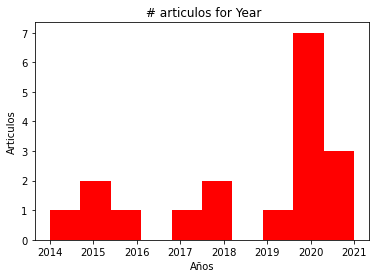

In [7]:
# Escriba aquí su código para el ejercicio 4
import pandas as pd
import matplotlib.pyplot as plot
from collections import Counter

pub_año["Año"] = pub_año["Año"].astype("int")
media = pub_año["Año"].mean()
desviacion = pub_año["Año"].std()
print ("La media es: ", media)
print ("La desviación estandar es: ", desviacion)


import pandas as pd 
import matplotlib.pyplot as plot
from collections import Counter

intervalos = range(min(pub_año["Año"]), max(pub_año["Año"]))
plot.hist(x=pub_año["Año"], color = "red")
plot.title(" # articulos for Year")
plot.xlabel("Años")
plot.ylabel("Articulos")


Text(0, 0.5, 'Repetition')

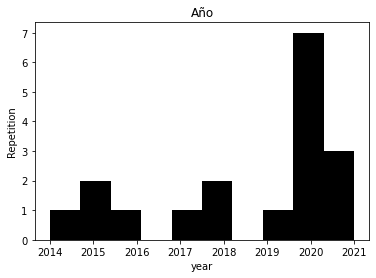

In [8]:

import pandas as pd 
import matplotlib.pyplot as plot
from collections import Counter


intervalos = range(0, 1000)
plot.hist(x=pub_año["Año"], color = "black")
plot.title("Año")
plot.xlabel("year")
plot.ylabel("Repetition")


## Ejercicio 5 [1 punto]

**La media es:  2018.611111111111**
**La desviación estandar es:  2.2787738934603277**

### Escriba la respuesta del ejercicio 5


## Ejercicio 6 [2 puntos]

Para algún gen de interés, realice lo siguiente: 

1. Una búsqueda en la página del [NCBI nucleotide](https://www.ncbi.nlm.nih.gov/nucleotide/).

2. Descargue el ```Accession List``` de su búsqueda.

3. Cargue el ```Accession List``` en este notebook y haga una descarga de la data tipo ```genbank``` utilizando los diez primeros IDs de accesión. 

4. Arme un árbol filogenético para los resultados del paso 3.

5. Interprete el árbol del paso 4. 

In [ ]:

with open("./sequence.seq") as s:
    Entrez.email ="silvana.morocho@est.ikiam.edu.ec" 
    with Entrez.efetch( db="nucleotide", rettype="gb", retmode="text", id='AB015700.1, MK351837.1, KR822249.1, KR822253.1, KR822252.1, KJ911887.1, MK204466.1, MF695813.1,KY861748.1, KX270335.1'
                  ) as handle: 
        for seq_record in SeqIO.parse(handle, "gb"): 
            print("%s %s..." % (seq_record.id, seq_record.description[:100])) 
            print( "Sequence length %i, %i features, from: %s" % ( len(seq_record), 
                                                                  len(seq_record.features), 
                                                                  seq_record.annotations["source"], ) )


In [1]:

from Bio import AlignIO
from Bio import Phylo
from Bio.Align.Applications import ClustalwCommandline
import os




In [ ]:

from Bio import AlignIO
from Bio import Phylo


import os
from Bio.Align.Applications import ClustalwCommandline

clustalw_exe = r"/home/jeffo/Documentos/GitHub/ExamenParcial_Pyth/clustal/clustalw2"   
clustalw_cline = ClustalwCommandline(clustalw_exe, infile="sequence.fasta")
assert os.path.isfile(clustalw_exe), "Clustal W executable missing"
stdout, stderr = clustalw_cline()




In [ ]:
ClustalAlign = AlignIO.read("./sequence.aln", "clustal")
print(ClustalAlign[0:10])

## Ejercicio 7 [1 punto]


1. Cree en GitHub un repositorio de nombre ```GBI6_ExamenPython```. 
2. Cree un archivo ```Readme.md``` que debe tener lo siguiente: 
- Datos personales
- Características del computador
- Versión de Python/Anaconda y de cada uno de los módulos/paquetes y utilizados
- Explicación de la data utilizada

3. Cree un directorio de nombre ```data``` donde deben estar guardado la data utilizada 
4. Realice al menos 1 control de la versión (commits) por cada ejercicio (del 1 al 6), con un mensaje que inicie como: 

```sh 
Carlitos Alimaña ha realizado .....  
```